Jarak terpendek: 6
Lintasan terpendek: 0000


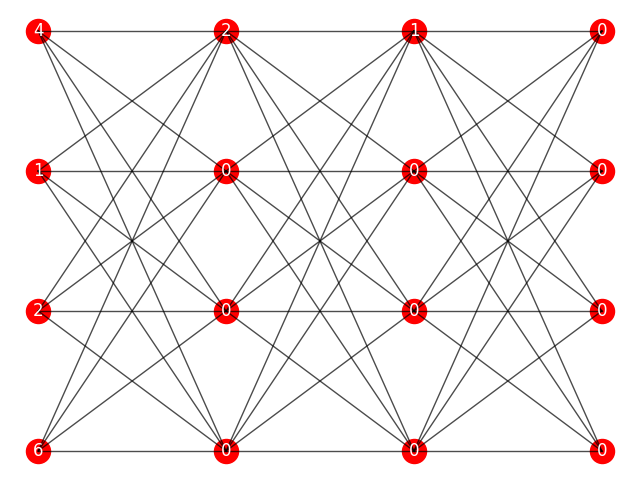

In [1]:
import matplotlib.pyplot as plt

# Fungsi untuk menggambar multistage graph
def draw_multistage_graph(graph):
    plt.figure(figsize=(8, 6))
    plt.axis('off')

    levels = len(graph)
    nodes_per_level = len(graph[0])

    x_coordinates = [i for i in range(levels)]
    y_coordinates = [i for i in range(nodes_per_level)]

    # Menggambar node pada setiap level
    for i in range(levels):
        for j in range(nodes_per_level):
            plt.scatter(x_coordinates[i], y_coordinates[j], s=300, color='red')
            plt.text(x_coordinates[i], y_coordinates[j], graph[i][j],
                     ha='center', va='center', color='white', fontsize=12)

    # Menggambar garis yang menghubungkan node pada setiap level
    for i in range(levels - 1):
        for j in range(nodes_per_level):
            for k in range(nodes_per_level):
                plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[j], y_coordinates[k]],
                         linestyle='-', linewidth=1, color='black', alpha=0.7)

    plt.show()

# Fungsi untuk menemukan lintasan terpendek pada multistage graph menggunakan dynamic programming
def shortest_path_multistage(graph):
    levels = len(graph)
    nodes_per_level = len(graph[0])

    # Matriks untuk menyimpan jarak terpendek
    shortest_distances = [[float('inf')] * nodes_per_level for _ in range(levels)]

    # Matriks untuk menyimpan lintasan terpendek
    shortest_paths = [[''] * nodes_per_level for _ in range(levels)]

    # Menginisialisasi jarak terpendek pada level terakhir
    for j in range(nodes_per_level):
        shortest_distances[levels-1][j] = graph[levels-1][j]
        shortest_paths[levels-1][j] = str(j)

    # Menghitung jarak terpendek dan lintasan terpendek dari level sebelumnya hingga level pertama
    for i in range(levels - 2, -1, -1):
        for j in range(nodes_per_level):
            for k in range(nodes_per_level):
                distance = graph[i][j] + shortest_distances[i+1][k]
                if distance < shortest_distances[i][j]:
                    shortest_distances[i][j] = distance
                    shortest_paths[i][j] = str(j) + shortest_paths[i+1][k]

    # Mengembalikan jarak terpendek dan lintasan terpendek
    return shortest_distances[0][0], shortest_paths[0][0]

# Contoh penggunaan
graph = [
    [6, 2, 1, 4],
    [0, 0, 0, 2],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
]

shortest_distance, shortest_path = shortest_path_multistage(graph)

print(f"Jarak terpendek: {shortest_distance}")
print(f"Lintasan terpendek: {shortest_path}")

# Gambar multistage graph
draw_multistage_graph(graph)
